In [1]:
from torch_snippets import *

In [2]:
import os
from PIL import Image,ImageDraw

In [3]:
image_path = 'C:/Users/rd238422/Cloud_Detection/Smoke_Detection_C.v3i.yolov8/valid/images/H_00140_png_jpg.rf.e0bb617a8be055f42b1af5854f5da5f6.jpg'

In [4]:
data_dir = 'C:/Users/rd238422/Cloud_Detection/Smoke_Detection_C.v3i.yolov8/valid/labels/H_00140_png_jpg.rf.e0bb617a8be055f42b1af5854f5da5f6.txt'

In [81]:
def read_labels(label_path):
    with open(label_path) as r:
        lines = r.readlines()
    labels = []
    
    for line in lines:
        values = line.strip().split(' ')
        labels.append({
            'class_id':int(values[0]),
            'x_center':float(values[1]),
            'y_center':float(values[2]),
            'width':float(values[3]),
            'height':float(values[4])
        })
    return labels

In [82]:
def show_image(image_path,label_path):
    image = Image.open(image_path)
    labels = read_labels(label_path)
    
   # draw = ImageDraw.Draw(Image)
    bbs = []
    for label in labels:
        width, height = image.size
        x_center = (label['x_center']*width)
        y_center = (label['y_center']*height)
        box_width = (label['width']*width)
        box_height = (label['height']*height)
        
        x_min = (x_center - box_width/2)
        
        x_max = (x_center+box_width/2)
        y_min = (y_center-box_height/2)
        
        y_max = (y_center+box_height/2)
        val = np.array([x_min, y_min, x_max, y_max],dtype=np.uint16)
        bbs.append(val)
        
    return image,bbs

In [83]:
image, bbs = show_image(image_path,data_dir)

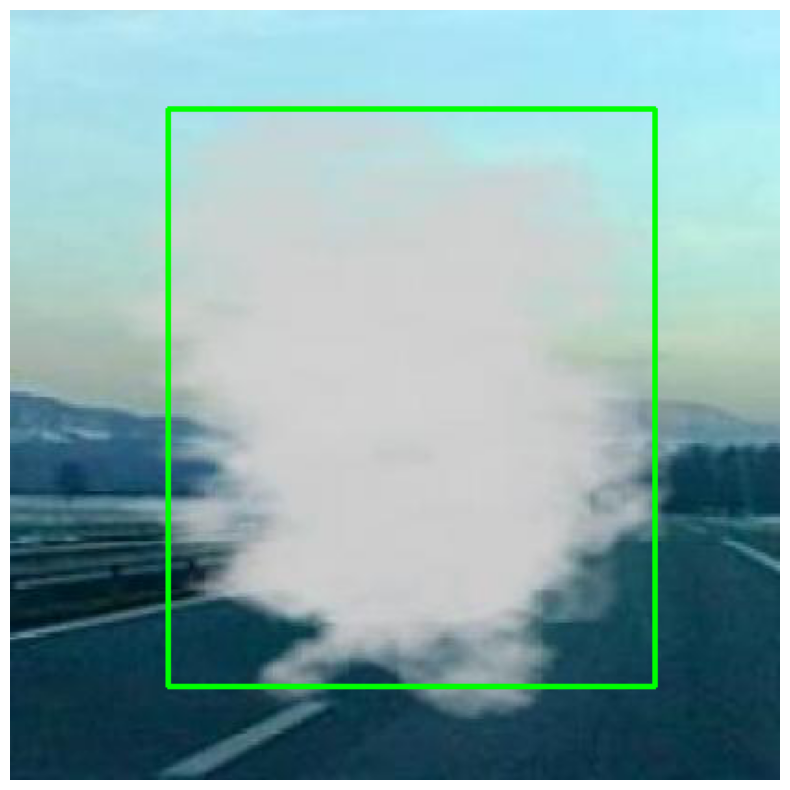

In [84]:
show(image,bbs=bbs)

In [85]:
!pip install ultralytics


                                              0.0/705.7 kB ? eta -:--:--
     ---------                              184.3/705.7 kB 5.6 MB/s eta 0:00:01
     -------------------------------------  696.3/705.7 kB 8.8 MB/s eta 0:00:01
     -------------------------------------- 705.7/705.7 kB 7.4 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

In [87]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch


In [96]:
results = model.train(data="config.yaml", epochs=100)  # train the model

Ultralytics YOLOv8.1.7 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning C:\Users\rd238422\Cloud_Detection\Smoke_Detection_C.v3i.yolov8\train\labels.cache... 500 images, 0 back
val: Scanning C:\Users\rd238422\Cloud_Detection\Smoke_Detection_C.v3i.yolov8\valid\labels.cache... 143 images, 0 backgr


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.27G      2.971      3.214      4.067         10        640: 100%|██████████| 32/32 [00:05<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143    0.00333          1     0.0236     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.27G      2.814      2.903      3.662         12        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.036      0.993      0.119     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G       2.54      2.736      3.284         10        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143    0.00372          1     0.0936      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.28G      2.305      2.487      3.028         10        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143    0.00491      0.021    0.00194    0.00023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.28G      2.157      2.204      2.817         13        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143    0.00491      0.021    0.00194    0.00023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.28G      2.127      2.052      2.721         10        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.336      0.329       0.27     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.28G      2.091      1.964      2.666          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143       0.69      0.755      0.755      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.28G      1.982       1.79      2.579          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.662      0.748      0.757      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.28G      1.911      1.699      2.468          8        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.597      0.685      0.701      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.28G      1.865      1.625      2.447          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.798      0.846       0.89       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.28G       1.83      1.531      2.356          9        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.811      0.965      0.943      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.28G      1.786      1.443      2.324         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.874      0.944      0.952      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.28G      1.715      1.444       2.29         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.947      0.909      0.974      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.28G      1.694      1.365      2.234         14        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.826      0.874      0.908      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.28G      1.688      1.331      2.245         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.875      0.916       0.94      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.28G      1.661      1.344      2.229          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.946      0.944      0.973      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.28G      1.603       1.28        2.2         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143       0.92      0.972      0.974      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.28G      1.585      1.265      2.181         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.921      0.937      0.966      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.28G       1.58      1.268      2.145         13        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143       0.89       0.93      0.953      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.27G      1.637      1.249      2.183          5        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143       0.92      0.923      0.945      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.28G      1.586      1.226      2.152          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.966      0.979      0.989      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.28G      1.549      1.163        2.1         13        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143      0.963      0.915       0.98      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.28G      1.572        1.2      2.144          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.959      0.971      0.988      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.28G      1.527      1.147      2.108         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.882      0.893      0.924      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.27G       1.51      1.137      2.069          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.945      0.916      0.966      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.28G      1.498      1.088      2.075         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.982      0.937       0.99      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.27G      1.538      1.144      2.135          6        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.936      0.925      0.949      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.28G      1.524      1.149      2.095          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.975      0.972      0.987      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.28G      1.502      1.094      2.061         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.954      0.958      0.968      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.28G      1.485      1.079       2.04         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.948      0.944      0.964      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.28G      1.484      1.061      2.036          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.951      0.979      0.989      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.28G      1.464      1.073      2.038          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.918      0.916      0.949      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.28G      1.494      1.072      2.027         16        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.935       0.93       0.97      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.28G      1.477      1.032      2.054         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.972      0.951      0.982      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.28G      1.443      1.038      2.012         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.957      0.951      0.983      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.28G      1.418      1.012      2.001         13        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.945      0.944      0.963      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.28G      1.408      1.016      1.988          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.933      0.958      0.966      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.28G       1.44      1.039      1.997         12        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.952      0.916      0.959      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.28G      1.424     0.9919      2.004         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.944       0.95      0.969      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.28G      1.419      1.012       2.01          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.986      0.979      0.988      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.28G       1.43     0.9917      1.991         16        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.923       0.93      0.935      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.27G      1.414     0.9578      1.971          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.955      0.944      0.969      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.28G      1.415     0.9729       1.97         13        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.942      0.965       0.98      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.28G      1.403     0.9928      1.983          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.953      0.972      0.989       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.28G      1.394     0.9577      1.984         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.965      0.975      0.982      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.28G      1.415     0.9691      1.983         11        640: 100%|██████████| 32/32 [00:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.945      0.961       0.98      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G       1.36     0.9427      1.935         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.968      0.958      0.986      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.28G      1.364     0.9487      1.951          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.946      0.983      0.987      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.27G      1.378     0.9374      1.941          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.971      0.972       0.99      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.28G      1.405     0.9742      1.968         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.956      0.986      0.987      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.27G      1.387     0.9493      1.963          6        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.966       0.98      0.991      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.28G      1.412     0.9415      1.972          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.978      0.979      0.993      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.28G      1.363     0.9526      1.917          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.993      0.991       0.99      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.28G      1.366     0.9496       1.94          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.987      0.986      0.993      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.28G      1.367     0.9104      1.926         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.986      0.964      0.989      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.28G      1.348     0.9031      1.923          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.986      0.993      0.993      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.27G      1.346     0.9259      1.928          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.998      0.993      0.995      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.28G       1.36     0.8798      1.915         14        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.966      0.987       0.99      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.28G      1.323     0.8807      1.891         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<0

                   all        143        143      0.979      0.999      0.994      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.27G      1.314     0.8914      1.898          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143       0.97      0.979      0.994      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.28G      1.311     0.8662       1.88          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.979      0.973      0.993      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.28G      1.316     0.9151      1.893         14        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.958      0.972      0.986      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.28G      1.347     0.9233       1.93          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.972      0.967      0.988      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G      1.348     0.8967      1.921         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.959      0.989      0.993      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.28G      1.316     0.8753      1.883         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.979      0.986      0.993      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.28G      1.301     0.8501      1.868         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.966      0.985       0.99      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.28G      1.316     0.8836      1.887          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.986      0.978      0.993      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G      1.291     0.8375      1.863         13        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.957      0.979      0.977      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.28G      1.267     0.8384      1.851         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.985      0.993      0.994      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.28G      1.285     0.8162      1.857         14        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.971      0.993      0.991      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.28G       1.27     0.8591      1.833          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.983          1      0.994      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.28G      1.303     0.8649      1.885         11        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.953      0.983      0.988       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.28G      1.303     0.8629      1.868         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.991          1      0.995      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G      1.272     0.8302       1.84         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.983      0.993      0.991       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.28G        1.3     0.8157      1.876         14        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.977          1      0.995      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G      1.255     0.8216      1.834          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.993      0.976       0.99      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.28G      1.295     0.8427      1.856         12        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.965      0.986       0.99       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.27G      1.282      0.819      1.867          6        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.973      0.993      0.993       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.28G      1.247     0.8117      1.817         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.991      0.993      0.992      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.27G      1.251     0.8236      1.829          6        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.972      0.978      0.992      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.28G      1.277     0.8161      1.837         11        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.972      0.979      0.992      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.28G      1.247     0.8145       1.83         10        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.986      0.991      0.993      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.28G      1.235     0.8114      1.803          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.988      0.993      0.993      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.27G      1.235     0.7941       1.83          7        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.972       0.98      0.985      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.28G      1.214     0.7886      1.797         13        640: 100%|██████████| 32/32 [00:11<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143      0.988      0.986      0.993      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G      1.252     0.8051      1.838         11        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.981      0.986      0.994      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.28G      1.255     0.8137      1.823          9        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.987      0.993      0.994      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.28G      1.243     0.8278      1.817          8        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.983      0.993      0.993      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.28G      1.226     0.8007      1.792          8        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.992      0.993      0.993      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.28G      1.214     0.7682      1.802         12        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143      0.991          1      0.995       0.66


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.27G      1.228     0.6997      1.952          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.986      0.991      0.989      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.27G        1.2     0.5739      1.911          4        640: 100%|██████████| 32/32 [00:06<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.993      0.991      0.993       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.27G      1.157     0.5707      1.902          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143      0.981      0.972      0.992      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.27G       1.16      0.546      1.885          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143       0.97      0.993      0.993      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.27G      1.148     0.5409      1.872          4        640: 100%|██████████| 32/32 [00:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.991      0.993      0.994      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.27G      1.156      0.537      1.876          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143      0.996          1      0.995      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.27G      1.128     0.5241      1.855          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.989      0.993      0.994      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.27G      1.159      0.529       1.88          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.988      0.993      0.994      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.27G      1.113     0.5298      1.872          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0

                   all        143        143      0.988      0.993      0.994      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.27G      1.095     0.5147      1.816          4        640: 100%|██████████| 32/32 [00:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<0

                   all        143        143      0.988      0.993      0.994       0.66



100 epochs completed in 10.854 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 1101.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 983.4MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.7 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<0


                   all        143        143      0.992      0.993      0.993      0.665
Speed: 0.8ms preprocess, 2.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train2


In [51]:
# Testing the trained model on the cloud video
video_dir = 'C:/Users/rd238422/Cloud_Detection/'
video_path = os.path.join(video_dir,'cloud10.mp4')
cap = cv2.VideoCapture(video_path)
ret,frame = cap.read()
frame.shape

(1080, 1920, 3)

In [52]:
video_path_out = '{}_out.mp4'.format(video_path)
H,W,_ = frame.shape
out = cv2.VideoWriter(video_path_out,cv2.VideoWriter_fourcc(*'MP4V'),int(cap.get(cv2.CAP_PROP_FPS)), (W, H))
model_path = 'C:/Users/rd238422/Cloud_Detection/runs/detect/train2/weights/last.pt'


In [9]:
# Load the video frame
model = YOLO(model_path)

In [53]:
threshold = 0.5
while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()


0: 384x640 (no detections), 49.0ms
Speed: 4.7ms preprocess, 49.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 50.5ms
Speed: 6.0ms preprocess, 50.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 48.7ms
Speed: 2.1ms preprocess, 48.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 53.2ms
Speed: 4.0ms preprocess, 53.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.0ms
Speed: 3.0ms preprocess, 49.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 49.7ms
Speed: 3.0ms preprocess, 49.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 48.4ms
Speed: 3.0ms preprocess, 48.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 47.6ms
Speed: 3.0ms preprocess, 47.6ms i


0: 640x640 1 cloud, 63.1ms
Speed: 7.0ms preprocess, 63.1ms inference, 12.6ms postprocess per image at shape (1, 3, 640, 640)


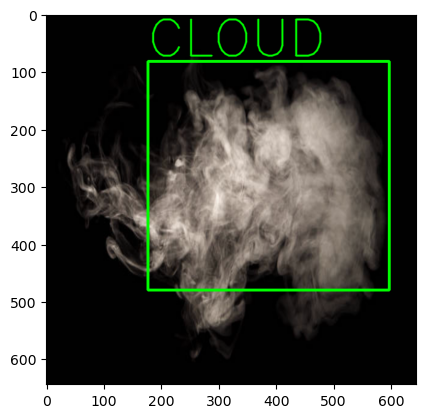

In [74]:
# Testing an image
threshold = 0.5
img_path = 'C:/Users/rd238422/Cloud_Detection/smoke3.jpg'
img = cv2.imread(img_path,1)
img = cv2.resize(img,(644,644))
output = model(img)[0]

for result in output.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
      
        if score > threshold:
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(img, output.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
            cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)

            
plt.imshow(img)